In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import os

In [23]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [24]:
# training dataset preparation

path = "/home/fedlearn/Downloads/cifar-10-python/cifar-10-batches-py/"
os.chdir(path)

trainX = []
trainy = []

for file in os.listdir():
    if("data_batch" in file):
        file_name = path+file
        data_batch = unpickle(file_name)
        
#         print(type(data_batch))
#         print(data_batch.keys())
        
        data_X = data_batch[b'data']
        data_X = data_X.reshape(len(data_X),3,32,32).transpose(0,2,3,1)
        trainX.append(data_X)
        
        data_y = data_batch[b'labels']
        data_y = np.array(data_y)
        trainy.append(data_y.reshape(10000,1))

train_images = np.concatenate((trainX[0],trainX[1],trainX[2],trainX[3],trainX[4]),axis=0)
train_labels = np.concatenate((trainy[0],trainy[1],trainy[2],trainy[3],trainy[4]),axis=0)

print(train_images.shape, train_labels.shape)
print(type(train_images), type(train_labels))

(50000, 32, 32, 3) (50000, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [25]:
# testing dataset preparation

#place the filepath of cifar_10 test
file_name = "/home/fedlearn/Downloads/cifar-10-python/cifar-10-batches-py/test_batch"

data_batch = unpickle(file_name)

# print(type(data_batch))
# print(data_batch.keys())

data_X = data_batch[b'data']
data_X = data_X.reshape(len(data_X),3,32,32).transpose(0,2,3,1)

data_y = data_batch[b'labels']
data_y = np.array(data_y).reshape(10000,1)

test_images, test_labels =  data_X, data_y

print(test_images.shape, test_labels.shape)
print(type(test_images), type(test_labels))

(10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


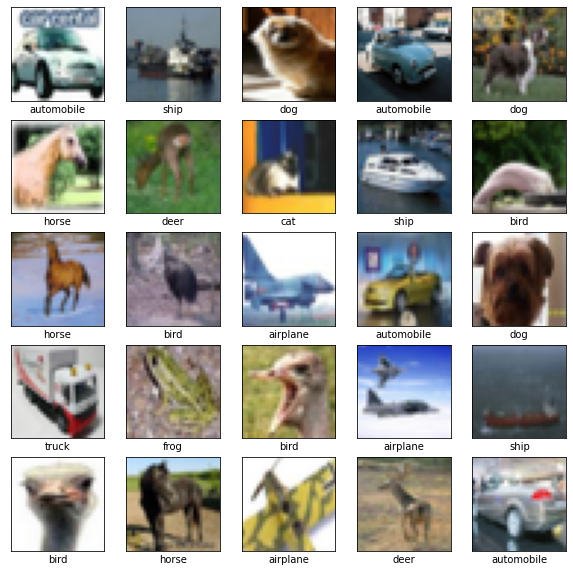

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [27]:
#Required Scaling
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
# one hot encode target values
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [29]:
def shuffle_dataset(trainX,trainY,testX,testY):
  # number of datapoints [0,1,2,.....,n]
  no_dataPoints_train = np.arange(0,trainX.shape[0]) # 50000
  no_dataPoints_test = np.arange(0,testX.shape[0])   # 10000

  # random shuffling
  np.random.shuffle(no_dataPoints_train)
  np.random.shuffle(no_dataPoints_test)

  # reshuffled original train data
  X_train = trainX[no_dataPoints_train]
  y_train = trainY[no_dataPoints_train]

  # reshuffled original test data
  X_test = testX[no_dataPoints_test]
  y_test = testY[no_dataPoints_test]

  return X_train,y_train,X_test,y_test

In [30]:
train_images, train_labels, test_images, test_labels = shuffle_dataset(train_images, train_labels, test_images, test_labels)

In [39]:
def get_iid_dataset(trainX, trainY):
  client_count=100
  e0 = 500
  s0 = 0
 
  local_xy_iid=[]
  for i in range(0,client_count):
    local_x= trainX[s0:e0,:]
    local_y= trainY[s0:e0,:]

    local_xy_iid.append((local_x,local_y))
    s0 = e0
    e0 += 500

  print("iid distribution of data done")
  return local_xy_iid

In [40]:
local_xy_iid = get_iid_dataset(train_images, train_labels)

iid distribution of data done


In [41]:
# how to extract iid dataset for clients {ex: clients = 100}

for i in range(0,100):
    X,y = local_xy_iid[i][0], local_xy_iid[i][1]
    print("Local Client ",i, " with IID distribution")
    print(X.shape, " ", y.shape)

Local Client  0  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  1  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  2  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  3  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  4  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  5  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  6  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  7  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  8  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  9  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  10  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  11  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  12  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  13  with IID distribution
(500, 32, 32, 3)   (500, 10)
Local Client  14  with IID distribution
(500